# PHYS 309 Assignment 1

### Getting started

<ul>
    <li>If you do not already have the <a href="https://www.anaconda.com/products/distribution">Anaconda <tt>python</tt> distribution</a>, click the link to install the individual, free version</li>
    <li>Download this notebook to your own computer, open with <tt>Jupyter</tt> notebook or lab, and complete the missing code. See the <a href="https://docs.jupyter.org/en/latest/start/index.html"><tt>Jupyter</tt> documentation</a> for help.</li>
</ul>

<strong>Instead of putting in the values of physical constants such as $c$ and $\epsilon_0$ by hand, use SI values pre-programmed into [scipy.constants](https://docs.scipy.org/doc/scipy/reference/constants.html). 
For example, $\mu_0$ is <tt>constants.mu_0</tt>. 

### Set up <tt>python</tt> environment

In [34]:
import numpy as np
import matplotlib.pyplot as plt

 # Contains physical constants defined in SI units (default) as well as other systems
from scipy import constants

# Make easily readable plots with large axis labels
plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif", 
                     "font.sans-serif":"Arial"})

### Questions


Recall that the speed of light in vacuum is 
\begin{equation}
c = \frac{1}{\sqrt{\epsilon_0 \mu_0}}, \; \; \; \; \; (1)
\end{equation}
where $\epsilon_0 = 8.85 \times 10^{-12}$ F/m (Farads per meter)$^{*}$ is the electric permittivity of free space and $\mu_0 = 1.26 \times 10^{-6}$ N/A$^2$ (Newtons per Ampere$^2$)$^{**}$ is the magnetic permeability of free space. The electric field created by a point charge $q$ is
\begin{equation}
E = \frac{1}{4 \pi \epsilon_0} \frac{q}{r^2}. \; \; \; \; (2)
\end{equation}
Suppose a charged particle is moving at some fraction of the speed of light in vacuum ($v_q = f c; \; 0 < f < 1$) as seen in reference frame $S$. Reference frame $S^{\prime}$ is co-moving with the point charge, so that $\frac{dx^{\prime}}{dt^{\prime}} = v^{\prime}_q = 0$ in frame $S^{\prime}$. To make the math easier, put $q$ at the origin of $S^{\prime}$.

To understand Einstein's motivation for developing the special theory of relativity, make the <strong>incorrect, erroneous, and wrong</strong> assumption that the Galilean velocity transformation holds true for all values of $f$:
\begin{equation}
\frac{dx^{\prime}}{dt^{\prime}} = \frac{dx}{dt} - v_q \; \; \; (3)
\end{equation}

<ol>
    <li>Assume the charged particle is an electron. Using Equation 2, calculate and plot the electric field as a function of distance $r^{\prime}$ from $q$ in frame $S^{\prime}$. Choose an x-axis range that makes sense to you and label both axes with correct units.</li>
</ol>

Text(0, 0.5, 'EField (Newtons/Coulomb)')

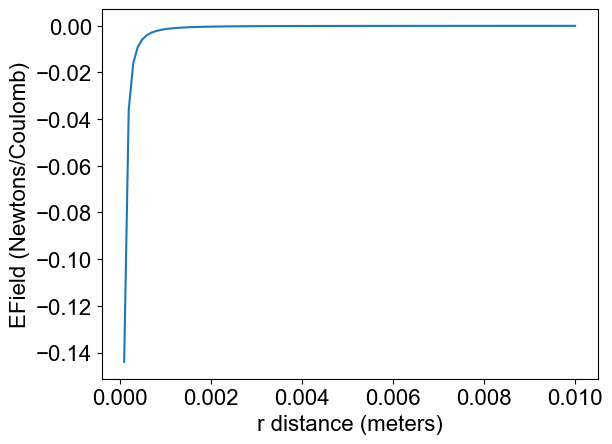

In [35]:
# Using k = 1/(4 * pi * epsilon_0)
k = 1 / (4 * np.pi * constants.epsilon_0)
def EField(r):
    return k * -constants.e / r**2
radii = np.linspace(0.0001, 0.01, num = 100, endpoint = True)
plt.plot(radii, EField(radii))
plt.xlabel('r distance (meters)')
plt.ylabel('EField (Newtons/Coulomb)')

<ol start=2>
    <li>The Galilean velocity transformation suggests that objects can "catch up" with light, so that light in a vacuum appears to be going slower than the value of $c$ from Equation (1). Make a plot of $c^{\prime}$, the <strong>incorrect</strong> speed of light in frame $S^{\prime}$ according to the Galilean transformation, as a function of $f$. Put units on the axes where appropriate.</li>
</ol>

Text(0.5, 1.0, "C' over f")

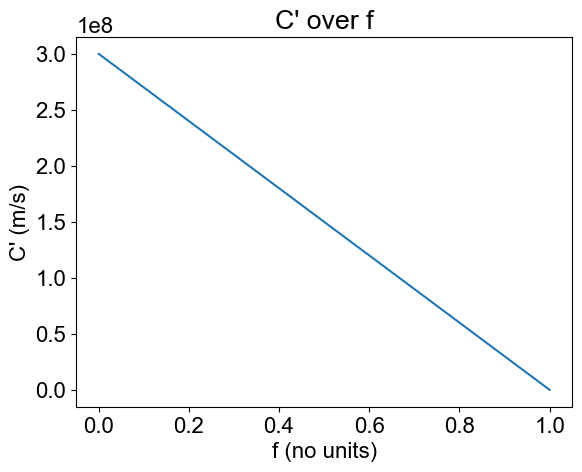

In [36]:
def CPrime(a):
    return constants.c * (1-a)

#Making a list from 0 to 1, by 0.01
points = np.linspace(0,1,100,True)

plt.plot(points, CPrime(points))
plt.xlabel("f (no units)")
plt.ylabel("C' (m/s)")
plt.title("C' over f")

<ol start=3>
    <li>In frame $S^{\prime}$, something has to give: either Equation (1) is no longer true, or the values of $\epsilon_0$ and/or $\mu_0$ have to change. Suppose Equation (1) is still true and $\mu_0 = \mu_0^{\prime}$. Make a plot with two vertically stacked subplots. The top subplot should show $\epsilon_0^{\prime}$ as a function of $f$, while the bottom plot should show the electric field $E^{\prime} = \frac{1}{4 \pi \epsilon_0^{\prime}} \frac{q}{{r^{\prime}}^2}$ at $r^{\prime} = 1 \mu \mathrm{m} = 10^{-6}$ m as a function of $f$. Put units on the axes where appropriate.</li>
</ol>

Text(0, 0.5, "E Field' (V/m)")

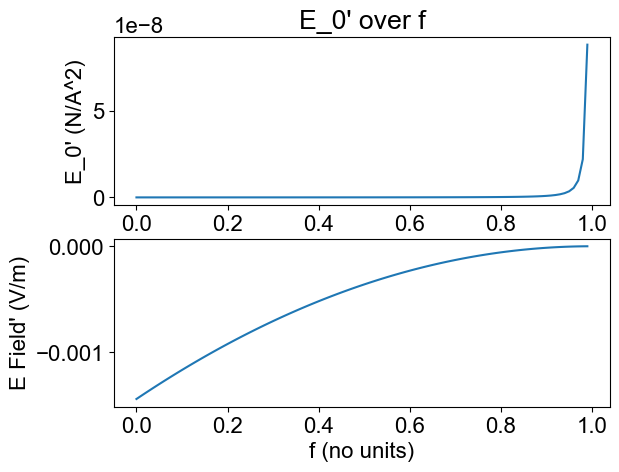

In [38]:
def CPrime(a):
    return constants.c * (1-a)

def Epsilon_prime(f):
    return 1/(constants.mu_0 * CPrime(f)**2)

def EFieldPrime(f):
    return (1 /(4 * np.pi * Epsilon_prime(f)) * (-constants.e / 10**-6))

points = np.linspace(0,1,100,False)

plt.subplot(211)
plt.plot(points, Epsilon_prime(points))
plt.xlabel("f (no units)")
plt.ylabel("E_0' (N/A^2)")
plt.title("E_0' over f")

plt.subplot(212)
plt.plot(points, EFieldPrime(points))
plt.xlabel("f (no units)")
plt.ylabel("E Field' (V/m)")

<ol start=4>
    <li>Now assume $f = 0.5$. In the same plot window, plot $E^{\prime}(r^{\prime})$ given by Equation 2 (same curve as in Problem 1) <em>and</em> $E^{\prime}(r^{\prime})$ calculated as in Problem 3, where $\epsilon_0^{\prime}$ is a function of $f$. Do you notice a problem?</li>
</ol>

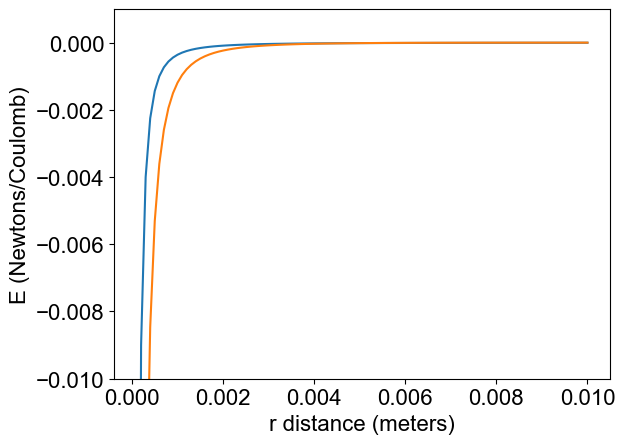

In [77]:
fig, ax = plt.subplots()
def EFieldPrime(epsilon, r):
    return (1/ (4 * np.pi * epsilon)) * -constants.e / r**2
radii = np.linspace(0.0001, 0.01, num = 100, endpoint = True)
ax.plot(radii, EFieldPrime(Epsilon_prime(0.5),radii))
plt.xlabel('r distance (meters)')
plt.ylabel('E (Newtons/Coulomb)')
plt.ylim([-0.01, 0.001])
ax.plot(radii, EFieldPrime(Epsilon_prime(points),radii))
#The two lines do not match with each other

<ol start=5>
    <li>To resolve the issues revealed by the plot from Problem 4, you may suggest setting $\epsilon_0^{\prime} = \epsilon_0$ and allowing $\mu_0^{\prime}$ to vary with $f$. Let's explore that solution. To accompany the point charge in problems 1-4, add a current loop that's also at rest in frame $S^{\prime}$. Recall that the magnitude of the magnetic field strength at the center of the loop in frame $S$ is $B = \frac{\mu_0 I}{2R}$, where $I$ is the current and $R$ is the radius of the loop. Suppose $I = 1$ A and $R = 1$ m. Assume $E^{\prime} = E$, $B^{\prime} = B$, and $c^{\prime}$ depends on $f$ as in problem 2. Plot $\mu_0$ as a function of $f$.</li>
</ol>

Text(0, 0.5, 'mu_0 (N/A^2)')

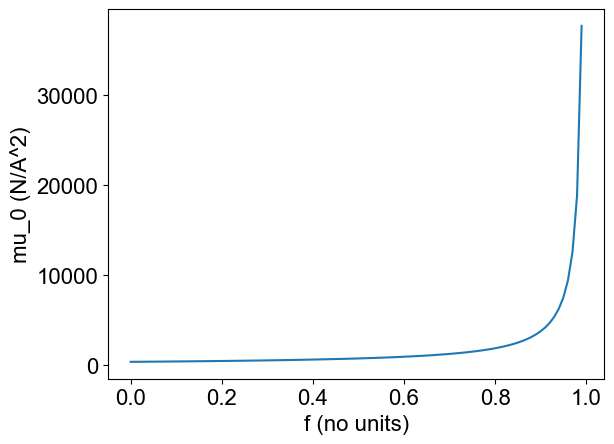

In [40]:
def muPrime(f):
    return 1 / (constants.epsilon_0 * CPrime(f))

plt.plot(points,muPrime(points))

plt.xlabel("f (no units)")
plt.ylabel('mu_0 (N/A^2)')

<ol start=6>
<li>If we calculate $c^{\prime}$ using the Galilean transformation in Equation 3, is there any value of $f$ for which $E^{\prime} = E$ <strong>and</strong> $B^{\prime} = B$? Make a graph to illustrate your answer.</li>
</ol>

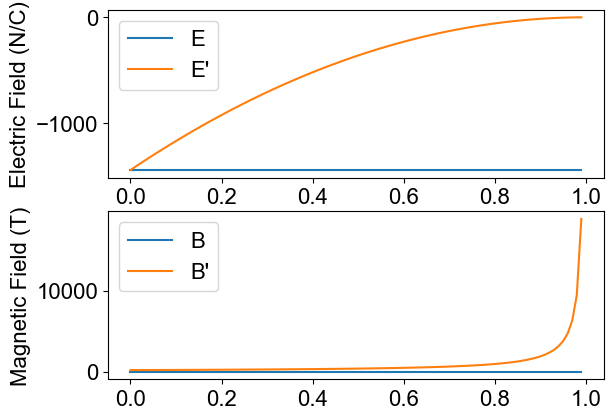

In [76]:
EFieldVal = -constants.e / (4 * np.pi * constants.epsilon_0 * (10**-6)**2)
BFieldVal = constants.mu_0 / 2
EVal = np.linspace(EFieldVal, EFieldVal, num = 100, endpoint = True)
BVal = np.linspace(BFieldVal, BFieldVal, num = 100, endpoint = True)

def BFieldPrime(f):
    return muPrime(f) / 2

def EFieldPrime(f):
    return (1 /(4 * np.pi * Epsilon_prime(f)) * (-constants.e / (10**-6)**2))

plt.subplot(211)
plt.plot(points,EVal,label = "E")
plt.plot(points,EFieldPrime(points),label = "E'")
plt.ylabel("Electric Field (N/C)")
plt.legend()

plt.subplot(212)
plt.plot(points,BVal,label = "B")
plt.plot(points,BFieldPrime(points), label = "B'")
plt.ylabel("Magnetic Field (T)")
plt.legend()

#The only places where the fields are the same in both cases is when f = 0

Conceptual questions about the conflict between the Galilean velocity transformation and E&M are in the written homework assignment.

$^{*}$Farad = Coulomb/Volt: Farad is the unit of capacitance, which measures the amount of charge necessary to increase the electric potential of a system by 1 Volt. Farads/meter measure how much capacitance you get per meter of free space between yourself and a charged particle.

$^{**}$Newtons/Ampere$^2$ = Newtons/(Coulombs/second)$^2$. $\mu_0$ measures how effective inductance is at creating magnetic force in free space.